=== COMPLETE MACHINE LEARNING MODELS ANALYSIS ===
=== USING SYNTHETIC DATA FOR DEMONSTRATION ===
Dataset dimensions: (2000, 20)
Missing values: 0
Target variable distribution:
target
1    0.5015
0    0.4985
Name: proportion, dtype: float64

Training set: (1600, 20)
Test set: (400, 20)

=== MODEL TRAINING AND OPTIMIZATION ===

--- Training Logistic Regression ---


/home/helder-braga/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/helder-braga/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/helder-braga/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/helder-braga/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/helder-braga/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best CV AUC: 0.9676
Training time: 4.29 seconds

--- Training Decision Tree ---
Best CV AUC: 0.9149
Training time: 11.16 seconds

--- Training Random Forest ---
Best CV AUC: 0.9858
Training time: 89.31 seconds

=== DETAILED MODEL COMPARISON ===
                 Model  Accuracy  Precision  Recall  F1-Score     AUC  \
2        Random Forest    0.9475     0.9455  0.9502    0.9479  0.9850   
0  Logistic Regression    0.9175     0.9158  0.9204    0.9181  0.9684   
1        Decision Tree    0.8375     0.8301  0.8507    0.8403  0.9058   

   CV AUC (Mean)  CV AUC (Std)  Time (s)  
2         0.9858        0.0066   89.3092  
0         0.9676        0.0075    4.2922  
1         0.9149        0.0146   11.1605  


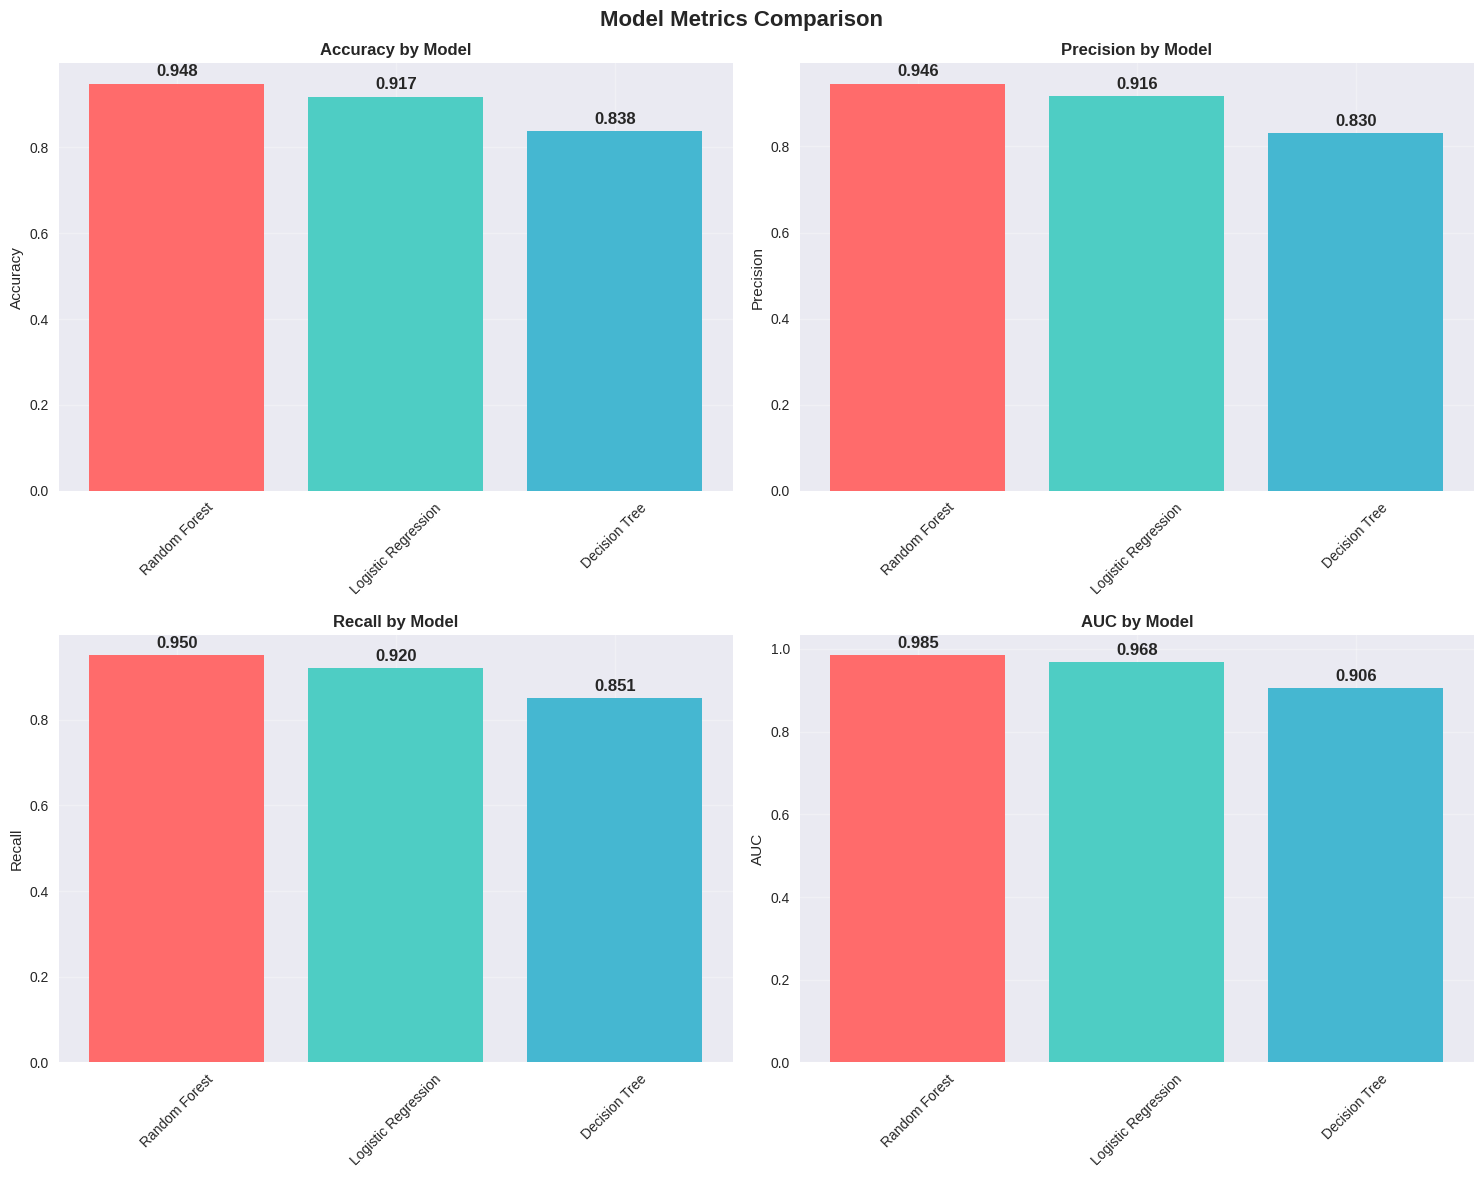

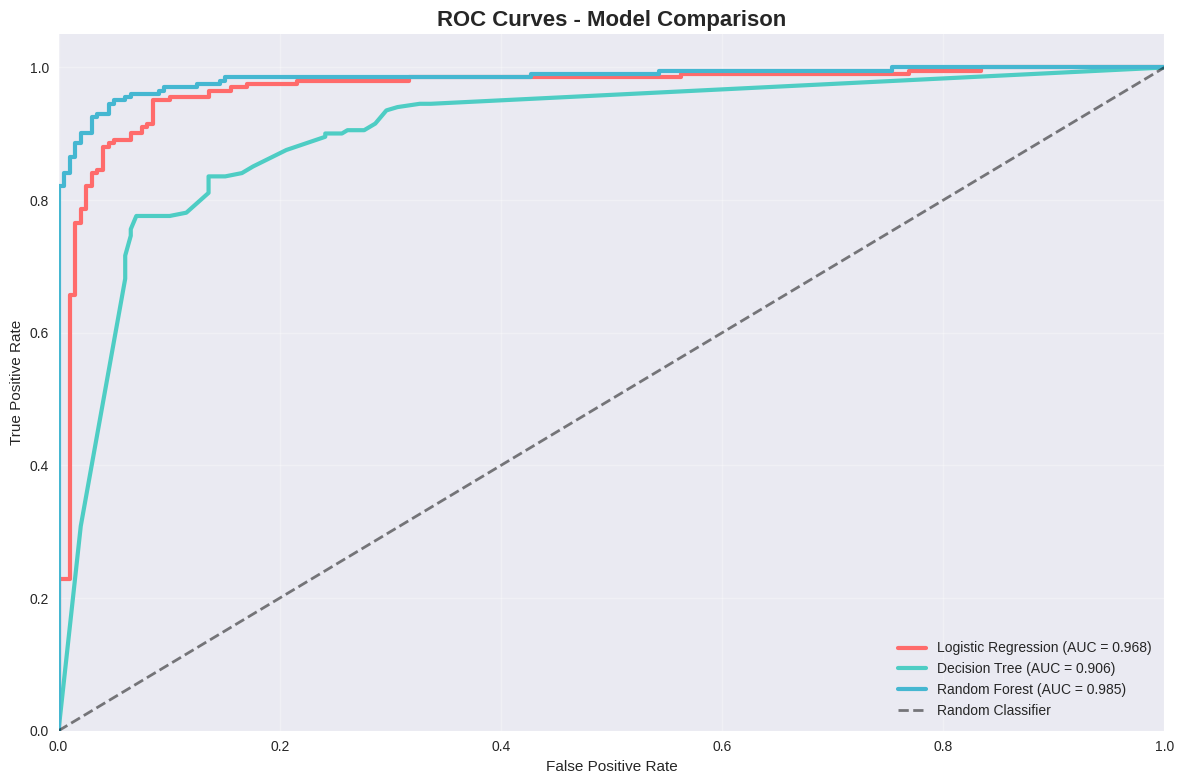

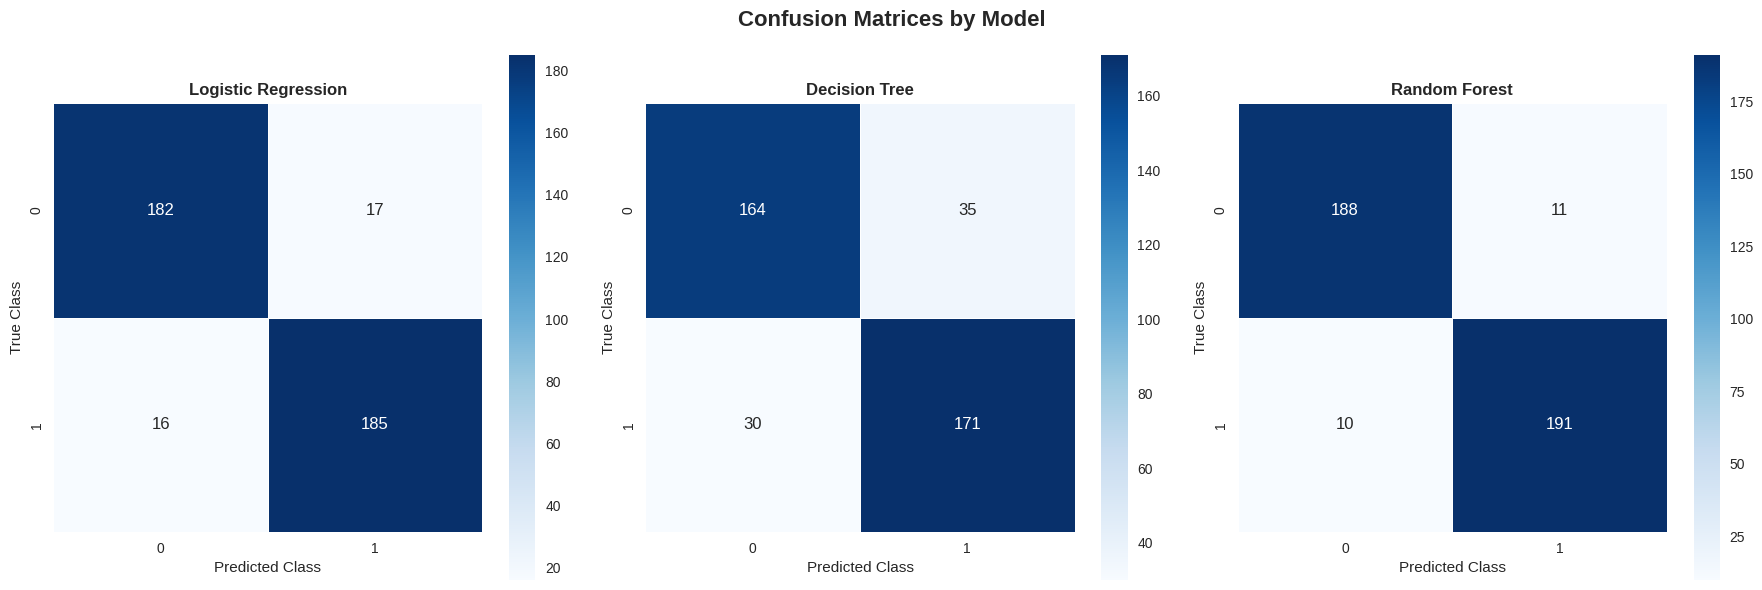


=== BEST MODEL: Random Forest ===
AUC: 0.9850
F1-Score: 0.9479
Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


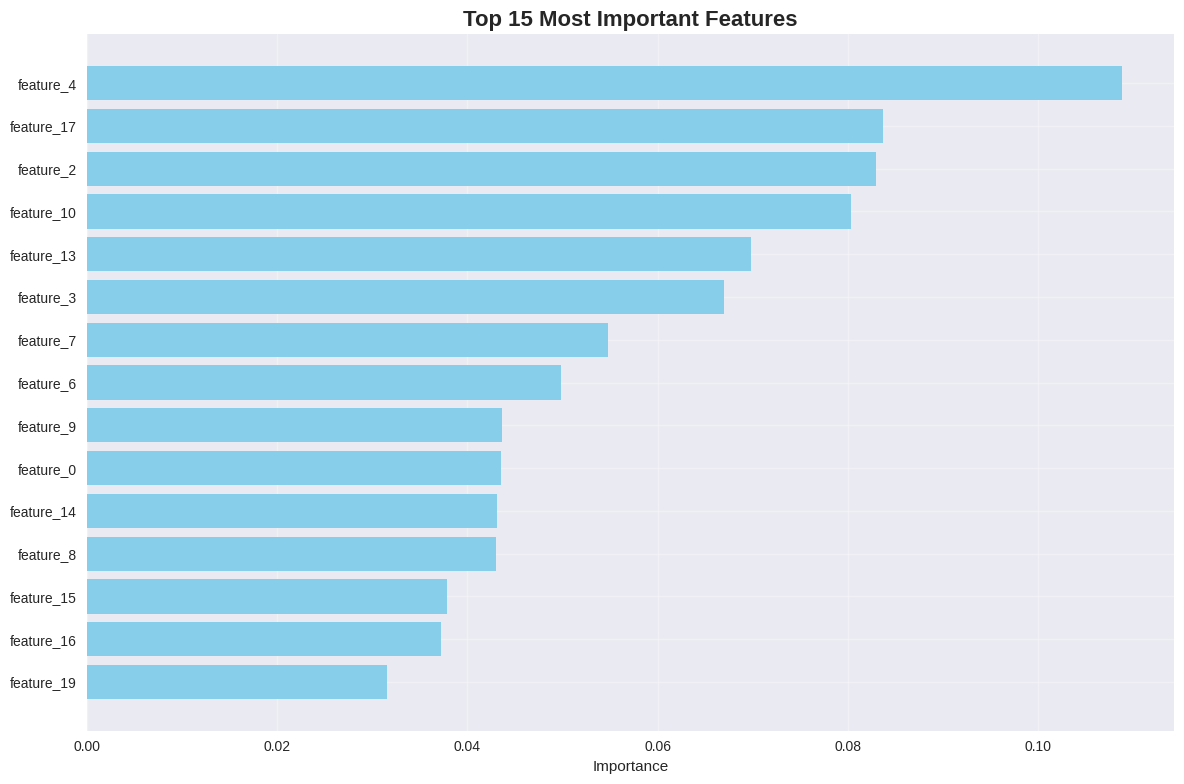

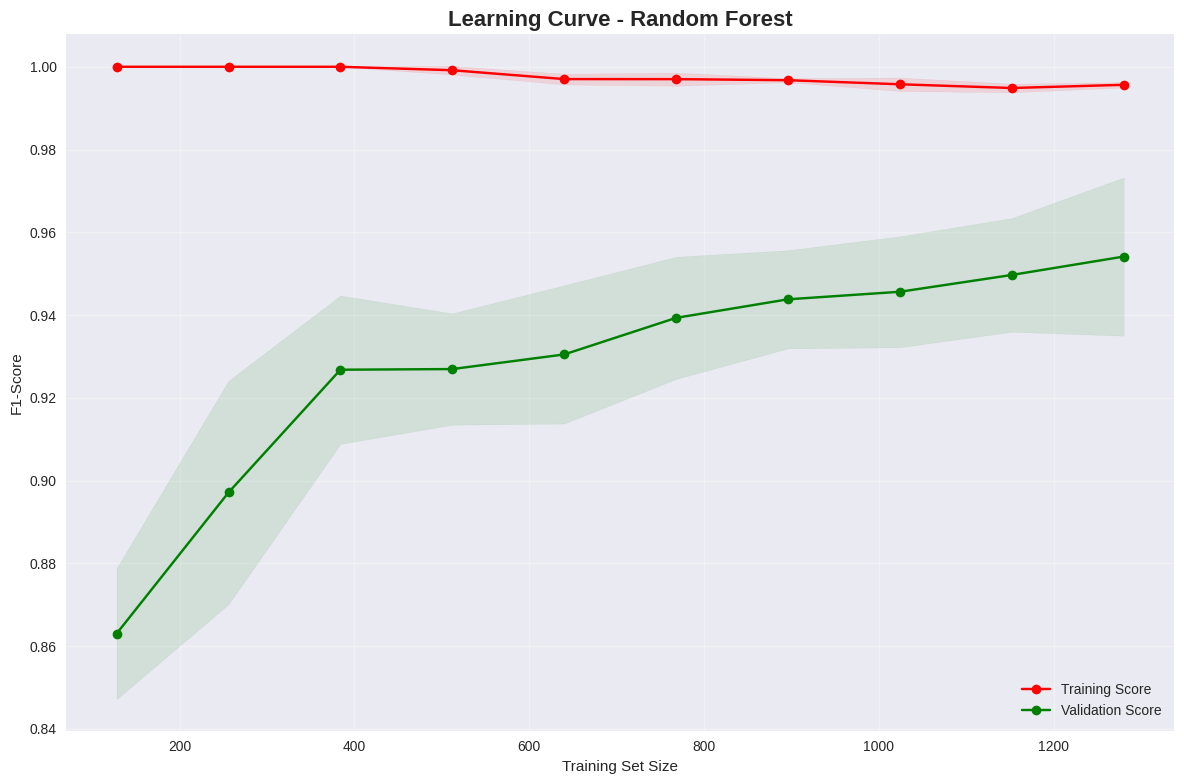

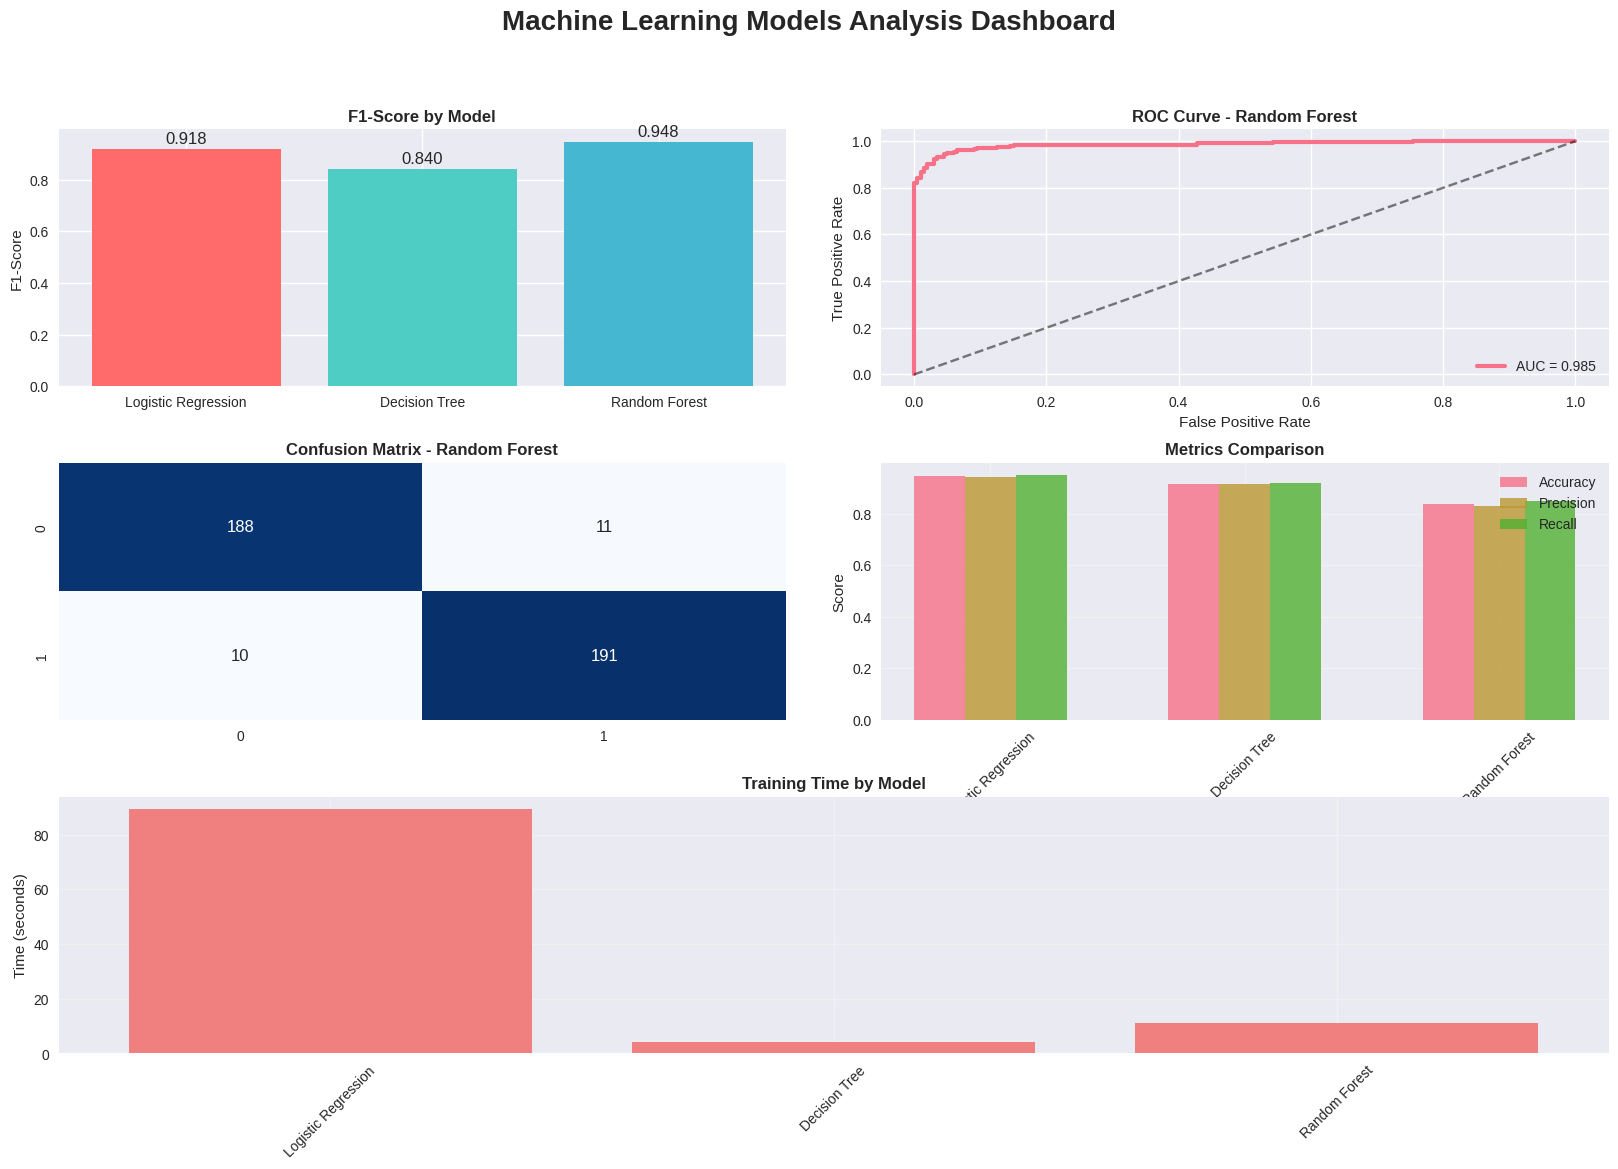


=== SAVING MODELS ===
Model Logistic Regression saved as logistic_regression_model.pkl
Model Decision Tree saved as decision_tree_model.pkl
Model Random Forest saved as random_forest_model.pkl

FINAL SUMMARY

FINAL SUMMARY
🏆 BEST MODEL: Random Forest
   - AUC: 0.9850
   - F1-Score: 0.9479
   - Accuracy: 0.9475

📊 RANKING (by AUC):
   1. Random Forest: AUC = 0.9850
   2. Logistic Regression: AUC = 0.9684
   3. Decision Tree: AUC = 0.9058

🎯 COMPLETE ANALYSIS FINISHED!


In [1]:
# COMPLETE MACHINE LEARNING MODELS ANALYSIS
# Logistic Regression, Decision Tree and Random Forest with Visualizations

# ---------- 1. LIBRARY IMPORTS ----------
import pandas as pd  # Data manipulation and analysis library
import numpy as np  # Numerical computing library
import matplotlib.pyplot as plt  # Plotting library for creating visualizations
import seaborn as sns  # Statistical data visualization library based on matplotlib
import joblib  # Library for saving and loading Python objects (models)
import time  # Time-related functions for measuring execution time
import warnings  # Warning control system
warnings.filterwarnings('ignore')  # Suppress warning messages for cleaner output

# Sklearn imports - Machine learning library
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # Model selection tools
from sklearn.model_selection import learning_curve, validation_curve  # Performance evaluation curves
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Data preprocessing tools
from sklearn.compose import ColumnTransformer  # Tool to apply different preprocessing to different columns
from sklearn.pipeline import Pipeline  # Tool to chain preprocessing and modeling steps
from sklearn.impute import SimpleImputer  # Tool to handle missing values

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  # Linear model for binary/multiclass classification
from sklearn.tree import DecisionTreeClassifier  # Tree-based classification algorithm
from sklearn.ensemble import RandomForestClassifier  # Ensemble method combining multiple decision trees

# Evaluation Metrics
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc,  # Classification metrics
                           accuracy_score, precision_score, recall_score, f1_score,  # Performance scores
                           roc_auc_score, precision_recall_curve)  # ROC and precision-recall metrics
from sklearn.calibration import calibration_curve  # Probability calibration evaluation

# Visualization Settings
plt.style.use('seaborn-v0_8')  # Set matplotlib style to seaborn for better-looking plots
sns.set_palette("husl")  # Set seaborn color palette to 'husl' for distinct colors
plt.rcParams['figure.figsize'] = (10, 6)  # Set default figure size for all plots
plt.rcParams['font.size'] = 12  # Set default font size for all plots

# ---------- 2. AUXILIARY FUNCTIONS ----------
def load_and_prepare_data(file_path=None, use_synthetic=True):
    """
    Loads and prepares the data for analysis
    
    Parameters:
    file_path (str): Path to the data file (optional)
    use_synthetic (bool): Whether to use synthetic data for demonstration
    
    Returns:
    tuple: Features (X) and target variable (y)
    """
    if use_synthetic or file_path is None:
        # Create synthetic data for demonstration purposes
        from sklearn.datasets import make_classification  # Import function to generate synthetic classification data
        print("=== USING SYNTHETIC DATA FOR DEMONSTRATION ===")
        # Generate synthetic classification dataset
        X, y = make_classification(
            n_samples=2000,  # Number of samples to generate
            n_features=20,  # Total number of features
            n_informative=15,  # Number of informative features
            n_redundant=5,  # Number of redundant features
            n_clusters_per_class=1,  # Number of clusters per class
            class_sep=0.8,  # Factor multiplying the hypercube size
            random_state=42  # Random seed for reproducibility
        )
        # Convert numpy arrays to pandas DataFrame and Series for easier manipulation
        feature_names = [f'feature_{i}' for i in range(X.shape[1])]  # Create feature names
        X = pd.DataFrame(X, columns=feature_names)  # Convert features to DataFrame
        y = pd.Series(y, name='target')  # Convert target to Series
    else:
        # Load real data from file
        df = pd.read_csv(file_path)  # Read CSV file into DataFrame
        X = df.drop('default.payment.next.month', axis=1)  # Features: all columns except target
        y = df['default.payment.next.month']  # Target variable
    
    # Print dataset information
    print(f"Dataset dimensions: {X.shape}")  # Print number of rows and columns
    print(f"Missing values: {X.isnull().sum().sum()}")  # Count total missing values
    print(f"Target variable distribution:")  # Print target distribution header
    print(y.value_counts(normalize=True))  # Print normalized target class distribution
    
    return X, y  # Return features and target

def create_preprocessor(X):
    """
    Creates a data preprocessor for numerical and categorical features
    
    Parameters:
    X (DataFrame): Input features
    
    Returns:
    tuple: Preprocessor object, numerical features, categorical features
    """
    # Identify numerical features (integer and float types)
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    # Identify categorical features (object and category types)
    categorical_features = X.select_dtypes(include=['object', 'category']).columns
    
    # Create preprocessing pipeline for numerical features
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Fill missing values with median
        ('scaler', StandardScaler())  # Standardize features by removing mean and scaling to unit variance
    ])
    
    # Create preprocessing pipeline for categorical features
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Convert categorical variables to binary vectors
    ])
    
    # Combine numerical and categorical transformers
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),  # Apply numeric transformer to numeric columns
            ('cat', categorical_transformer, categorical_features)  # Apply categorical transformer to categorical columns
        ])
    
    return preprocessor, numeric_features, categorical_features  # Return preprocessor and feature lists

def train_models(X_train, y_train, preprocessor):
    """
    Trains and optimizes all machine learning models using grid search
    
    Parameters:
    X_train (DataFrame): Training features
    y_train (Series): Training target
    preprocessor (ColumnTransformer): Data preprocessing pipeline
    
    Returns:
    dict: Dictionary containing trained models and their results
    """
    # Define models and their hyperparameter grids for optimization
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42, max_iter=1000),  # Linear classification model
            'params': {
                'classifier__C': [0.1, 1, 10, 100],  # Regularization strength (inverse)
                'classifier__penalty': ['l1', 'l2'],  # Regularization type
                'classifier__solver': ['liblinear', 'saga']  # Optimization algorithm
            }
        },
        'Decision Tree': {
            'model': DecisionTreeClassifier(random_state=42),  # Tree-based classification model
            'params': {
                'classifier__max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
                'classifier__min_samples_split': [2, 5, 10, 20],  # Minimum samples required to split a node
                'classifier__min_samples_leaf': [1, 2, 4, 8],  # Minimum samples required at a leaf node
                'classifier__criterion': ['gini', 'entropy']  # Measure of impurity
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=42),  # Ensemble of decision trees
            'params': {
                'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
                'classifier__max_depth': [None, 10, 20],  # Maximum depth of the trees
                'classifier__min_samples_split': [2, 5, 10],  # Minimum samples to split a node
                'classifier__min_samples_leaf': [1, 2, 4]  # Minimum samples at a leaf node
            }
        }
    }
    
    results = {}  # Dictionary to store results for each model
    print("\n=== MODEL TRAINING AND OPTIMIZATION ===")
    
    # Iterate through each model
    for model_name, model_info in models.items():
        print(f"\n--- Training {model_name} ---")
        start_time = time.time()  # Record start time for timing
        
        # Create pipeline combining preprocessing and model
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),  # Data preprocessing step
            ('classifier', model_info['model'])  # Classification model step
        ])
        
        # Perform grid search with cross-validation to find best hyperparameters
        grid_search = GridSearchCV(
            pipeline,  # The pipeline to optimize
            model_info['params'],  # Hyperparameter grid to search
            cv=5,  # 5-fold cross-validation
            scoring='roc_auc',  # Evaluation metric (Area Under ROC Curve)
            n_jobs=-1,  # Use all available processors
            verbose=0  # Suppress verbose output
        )
        
        grid_search.fit(X_train, y_train)  # Fit the grid search to training data
        best_model = grid_search.best_estimator_  # Get the best model from grid search
        
        # Perform additional cross-validation on the best model
        cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
        
        end_time = time.time()  # Record end time
        training_time = end_time - start_time  # Calculate training duration
        
        # Store results for this model
        results[model_name] = {
            'model': best_model,  # The trained model
            'best_params': grid_search.best_params_,  # Best hyperparameters found
            'cv_auc_mean': cv_scores.mean(),  # Mean cross-validation AUC score
            'cv_auc_std': cv_scores.std(),  # Standard deviation of CV AUC scores
            'training_time': training_time  # Time taken to train the model
        }
        
        # Print training results
        print(f"Best CV AUC: {cv_scores.mean():.4f}")
        print(f"Training time: {training_time:.2f} seconds")
    
    return results  # Return dictionary with all model results

def evaluate_models(results, X_test, y_test):
    """
    Evaluates all trained models on the test set
    
    Parameters:
    results (dict): Dictionary containing trained models
    X_test (DataFrame): Test features
    y_test (Series): Test target
    
    Returns:
    dict: Updated results dictionary with evaluation metrics
    """
    # Iterate through each model and evaluate on test set
    for model_name, result in results.items():
        model = result['model']  # Get the trained model
        
        # Make predictions on test set
        y_pred = model.predict(X_test)  # Binary predictions (0 or 1)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability predictions for positive class
        
        # Calculate evaluation metrics and add to results
        result.update({
            'y_pred': y_pred,  # Store binary predictions
            'y_pred_proba': y_pred_proba,  # Store probability predictions
            'accuracy': accuracy_score(y_test, y_pred),  # Accuracy: (TP + TN) / (TP + TN + FP + FN)
            'precision': precision_score(y_test, y_pred),  # Precision: TP / (TP + FP)
            'recall': recall_score(y_test, y_pred),  # Recall (Sensitivity): TP / (TP + FN)
            'f1_score': f1_score(y_test, y_pred),  # F1-Score: Harmonic mean of precision and recall
            'auc': roc_auc_score(y_test, y_pred_proba)  # Area Under ROC Curve
        })
    
    return results  # Return updated results dictionary

def create_comparison_dataframe(results):
    """
    Creates a comparison DataFrame with all model metrics
    
    Parameters:
    results (dict): Dictionary containing model results
    
    Returns:
    DataFrame: Comparison table sorted by AUC score
    """
    # Create DataFrame with all metrics for easy comparison
    comparison_df = pd.DataFrame({
        'Model': list(results.keys()),  # Model names
        'Accuracy': [results[model]['accuracy'] for model in results.keys()],  # Accuracy scores
        'Precision': [results[model]['precision'] for model in results.keys()],  # Precision scores
        'Recall': [results[model]['recall'] for model in results.keys()],  # Recall scores
        'F1-Score': [results[model]['f1_score'] for model in results.keys()],  # F1 scores
        'AUC': [results[model]['auc'] for model in results.keys()],  # AUC scores
        'CV AUC (Mean)': [results[model]['cv_auc_mean'] for model in results.keys()],  # Mean CV AUC
        'CV AUC (Std)': [results[model]['cv_auc_std'] for model in results.keys()],  # CV AUC standard deviation
        'Time (s)': [results[model]['training_time'] for model in results.keys()]  # Training time
    })
    return comparison_df.sort_values('AUC', ascending=False)  # Sort by AUC in descending order

# ---------- 3. VISUALIZATION FUNCTIONS ----------
def plot_metrics_comparison(comparison_df):
    """
    Creates a comparison plot of metrics across models
    
    Parameters:
    comparison_df (DataFrame): Comparison table with model metrics
    """
    # Create subplot grid for multiple metrics
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Model Metrics Comparison', fontsize=16, fontweight='bold')
    
    metrics = ['Accuracy', 'Precision', 'Recall', 'AUC']  # Metrics to plot
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Color palette for bars
    
    # Create bar plot for each metric
    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]  # Get appropriate subplot
        bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=colors)  # Create bar plot
        ax.set_title(f'{metric} by Model', fontweight='bold')  # Set subplot title
        ax.set_ylabel(metric)  # Set y-axis label
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
        ax.grid(True, alpha=0.3)  # Add grid with transparency
        
        # Add value labels on top of bars
        for bar, value in zip(bars, comparison_df[metric]):
            height = bar.get_height()  # Get bar height
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,  # Position text
                    f'{value:.3f}', ha='center', va='bottom', fontweight='bold')  # Add text label
    
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Display the plot

def plot_roc_curves(results, y_test):
    """
    Plots ROC curves for all models on the same graph
    
    Parameters:
    results (dict): Dictionary containing model results
    y_test (Series): True labels for test set
    """
    plt.figure(figsize=(12, 8))  # Create figure with specified size
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Color palette for different models
    
    # Plot ROC curve for each model
    for i, (model_name, result) in enumerate(results.items()):
        # Calculate ROC curve points
        fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])  # False Positive Rate, True Positive Rate
        auc_score = result['auc']  # AUC score for this model
        
        # Plot ROC curve
        plt.plot(fpr, tpr, lw=3, color=colors[i], 
                 label=f'{model_name} (AUC = {auc_score:.3f})')
    
    # Plot diagonal line representing random classifier
    plt.plot([0, 1], [0, 1], 'k--', lw=2, alpha=0.5, label='Random Classifier')
    
    # Set plot properties
    plt.xlim([0.0, 1.0])  # Set x-axis limits
    plt.ylim([0.0, 1.05])  # Set y-axis limits
    plt.xlabel('False Positive Rate')  # X-axis label
    plt.ylabel('True Positive Rate')  # Y-axis label
    plt.title('ROC Curves - Model Comparison', fontsize=16, fontweight='bold')  # Plot title
    plt.legend(loc="lower right")  # Position legend
    plt.grid(True, alpha=0.3)  # Add grid
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display plot

def plot_confusion_matrices(results, y_test):
    """
    Plots confusion matrices for all models
    
    Parameters:
    results (dict): Dictionary containing model results
    y_test (Series): True labels for test set
    """
    # Create subplot grid based on number of models
    fig, axes = plt.subplots(1, len(results), figsize=(6*len(results), 6))
    if len(results) == 1:  # Handle case with single model
        axes = [axes]
    fig.suptitle('Confusion Matrices by Model', fontsize=16, fontweight='bold')
    
    # Create confusion matrix for each model
    for i, (model_name, result) in enumerate(results.items()):
        ax = axes[i]  # Get appropriate subplot
        cm = confusion_matrix(y_test, result['y_pred'])  # Calculate confusion matrix
        
        # Create heatmap of confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                    cbar=True, square=True, linewidths=0.5)
        ax.set_title(f'{model_name}', fontweight='bold')  # Set subplot title
        ax.set_ylabel('True Class')  # Y-axis label
        ax.set_xlabel('Predicted Class')  # X-axis label
    
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display plot

def plot_feature_importance(best_model, feature_names=None):
    """
    Plots feature importance for tree-based models
    
    Parameters:
    best_model (Pipeline): Trained model pipeline
    feature_names (list): List of feature names (optional)
    
    Returns:
    DataFrame: Feature importance dataframe (if applicable)
    """
    classifier = best_model.named_steps['classifier']  # Extract classifier from pipeline
    
    # Check if model has feature importance attribute
    if hasattr(classifier, 'feature_importances_'):
        importances = classifier.feature_importances_  # Get feature importances
        
        # Create feature names if not provided
        if feature_names is None:
            feature_names = [f'Feature_{i}' for i in range(len(importances))]
        
        # Create DataFrame with feature importance
        feature_importance = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=True)  # Sort by importance
        
        # Create horizontal bar plot
        plt.figure(figsize=(12, 8))
        top_features = feature_importance.tail(15)  # Get top 15 features
        plt.barh(range(len(top_features)), top_features['importance'], color='skyblue')
        plt.yticks(range(len(top_features)), top_features['feature'])  # Set y-tick labels
        plt.xlabel('Importance')  # X-axis label
        plt.title('Top 15 Most Important Features', fontsize=16, fontweight='bold')  # Plot title
        plt.grid(True, alpha=0.3)  # Add grid
        plt.tight_layout()  # Adjust layout
        plt.show()  # Display plot
        
        return feature_importance  # Return feature importance DataFrame
    else:
        print("Model does not have feature importance")  # Print message if no feature importance
        return None  # Return None

def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    """
    Plots learning curve to analyze model performance vs training set size
    
    Parameters:
    estimator: Machine learning model
    X (DataFrame): Features
    y (Series): Target variable
    title (str): Plot title
    """
    # Calculate learning curve data
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1,  # 5-fold CV, use all processors
        train_sizes=np.linspace(0.1, 1.0, 10),  # Training sizes from 10% to 100%
        scoring='f1')  # Use F1-score as evaluation metric
    
    # Calculate mean and standard deviation for train and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Create learning curve plot
    plt.figure(figsize=(12, 8))
    # Plot training scores with confidence interval
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                     alpha=0.1, color='r')
    
    # Plot validation scores with confidence interval
    plt.plot(train_sizes, val_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                     alpha=0.1, color='g')
    
    # Set plot properties
    plt.xlabel('Training Set Size')  # X-axis label
    plt.ylabel('F1-Score')  # Y-axis label
    plt.title(title, fontsize=16, fontweight='bold')  # Plot title
    plt.legend(loc='best')  # Position legend
    plt.grid(True, alpha=0.3)  # Add grid
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display plot

def create_dashboard(results, y_test, comparison_df):
    """
    Creates a comprehensive dashboard with multiple visualizations
    
    Parameters:
    results (dict): Dictionary containing model results
    y_test (Series): True labels for test set
    comparison_df (DataFrame): Model comparison dataframe
    """
    # Create figure with custom grid layout
    fig = plt.figure(figsize=(20, 12))
    gs = fig.add_gridspec(3, 4, hspace=0.3, wspace=0.3)  # 3x4 grid with spacing
    
    # 1. F1-Score comparison bar chart
    ax1 = fig.add_subplot(gs[0, :2])  # Span first two columns of first row
    model_names = list(results.keys())
    f1_scores = [results[model]['f1_score'] for model in model_names]
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    bars = ax1.bar(model_names, f1_scores, color=colors)
    ax1.set_title('F1-Score by Model', fontweight='bold')
    ax1.set_ylabel('F1-Score')
    # Add value labels on bars
    for bar, score in zip(bars, f1_scores):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{score:.3f}', ha='center', va='bottom')
    
    # 2. ROC curve for best model
    best_model_name = comparison_df.iloc[0]['Model']  # Get best model name (first in sorted df)
    ax2 = fig.add_subplot(gs[0, 2:])  # Span last two columns of first row
    fpr, tpr, _ = roc_curve(y_test, results[best_model_name]['y_pred_proba'])
    roc_auc = auc(fpr, tpr)
    ax2.plot(fpr, tpr, linewidth=3, label=f'AUC = {roc_auc:.3f}')
    ax2.plot([0, 1], [0, 1], 'k--', alpha=0.5)  # Diagonal line
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title(f'ROC Curve - {best_model_name}', fontweight='bold')
    ax2.legend()
    
    # 3. Confusion matrix for best model
    ax3 = fig.add_subplot(gs[1, :2])  # First two columns of second row
    cm = confusion_matrix(y_test, results[best_model_name]['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax3, cbar=False)
    ax3.set_title(f'Confusion Matrix - {best_model_name}', fontweight='bold')
    
    # 4. Grouped bar chart comparing multiple metrics
    ax4 = fig.add_subplot(gs[1, 2:])  # Last two columns of second row
    x = np.arange(len(model_names))  # X positions for bars
    width = 0.2  # Width of each bar
    # Create grouped bars for different metrics
    ax4.bar(x - width, comparison_df['Accuracy'], width, label='Accuracy', alpha=0.8)
    ax4.bar(x, comparison_df['Precision'], width, label='Precision', alpha=0.8)
    ax4.bar(x + width, comparison_df['Recall'], width, label='Recall', alpha=0.8)
    ax4.set_xlabel('Models')
    ax4.set_ylabel('Score')
    ax4.set_title('Metrics Comparison', fontweight='bold')
    ax4.set_xticks(x)
    ax4.set_xticklabels(model_names, rotation=45)
    ax4.legend()
    ax4.grid(True, alpha=0.3)
    
    # 5. Training time comparison
    ax5 = fig.add_subplot(gs[2, :])  # Entire third row
    ax5.bar(model_names, comparison_df['Time (s)'], color='lightcoral')
    ax5.set_title('Training Time by Model', fontweight='bold')
    ax5.set_ylabel('Time (seconds)')
    ax5.tick_params(axis='x', rotation=45)
    ax5.grid(True, alpha=0.3)
    
    # Set main title for entire dashboard
    plt.suptitle('Machine Learning Models Analysis Dashboard', 
                 fontsize=20, fontweight='bold', y=0.98)
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display dashboard

# ---------- 4. MAIN EXECUTION ----------
def main():
    """
    Main function that orchestrates the entire machine learning analysis
    
    Returns:
    tuple: Results dictionary and comparison dataframe
    """
    print("=== COMPLETE MACHINE LEARNING MODELS ANALYSIS ===")
    
    # 1. Data loading and preparation
    X, y = load_and_prepare_data(use_synthetic=True)  # Change to False and provide file_path for real data
    
    # 2. Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2,  # 80% train, 20% test
        random_state=42,  # Random seed for reproducibility
        stratify=y  # Maintain class distribution in both sets
    )
    print(f"\nTraining set: {X_train.shape}")
    print(f"Test set: {X_test.shape}")
    
    # 3. Create data preprocessor
    preprocessor, numeric_features, categorical_features = create_preprocessor(X)
    
    # 4. Train and optimize models
    results = train_models(X_train, y_train, preprocessor)
    
    # 5. Evaluate models on test set
    results = evaluate_models(results, X_test, y_test)
    
    # 6. Create comparison dataframe
    comparison_df = create_comparison_dataframe(results)
    print("\n=== DETAILED MODEL COMPARISON ===")
    print(comparison_df.round(4))  # Print comparison table with 4 decimal places
    
    # 7. Generate visualizations
    plot_metrics_comparison(comparison_df)  # Metrics comparison plots
    plot_roc_curves(results, y_test)  # ROC curves
    plot_confusion_matrices(results, y_test)  # Confusion matrices
    
    # 8. Analyze best performing model
    best_model_name = comparison_df.iloc[0]['Model']  # Get name of best model
    best_model = results[best_model_name]['model']  # Get best model object
    
    print(f"\n=== BEST MODEL: {best_model_name} ===")
    print(f"AUC: {results[best_model_name]['auc']:.4f}")
    print(f"F1-Score: {results[best_model_name]['f1_score']:.4f}")
    print(f"Parameters: {results[best_model_name]['best_params']}")
    
    # 9. Feature importance analysis (for tree-based models)
    feature_names = list(X.columns) if hasattr(X, 'columns') else None
    plot_feature_importance(best_model, feature_names)
    
    # 10. Learning curve analysis
    plot_learning_curve(best_model, X_train, y_train, f"Learning Curve - {best_model_name}")
    
    # 11. Comprehensive dashboard
    create_dashboard(results, y_test, comparison_df)
    
    # 12. Save trained models to disk
    print("\n=== SAVING MODELS ===")
    for model_name, result in results.items():
        filename = f"{model_name.lower().replace(' ', '_')}_model.pkl"  # Create filename
        joblib.dump(result['model'], filename)  # Save model using joblib
        print(f"Model {model_name} saved as {filename}")
    
    # 13. Final summary report
    print("\n" + "="*60)
    print("FINAL SUMMARY")
    print("="*60)
    # 13. Final Summary
    # Section 13: This is the final section of the code to display results
    
    print("\n" + "="*60)
    # Prints a blank line followed by 60 "=" characters to create a visual separator
    
    print("FINAL SUMMARY")
    # Prints the title of the final section
    
    print("="*60)
    # Prints another line of 60 "=" characters to close the header
    
    print(f"🏆 BEST MODEL: {best_model_name}")
    # Displays the name of the best model using f-string and trophy emoji
    
    print(f"   - AUC: {results[best_model_name]['auc']:.4f}")
    # Prints the AUC value of the best model formatted with 4 decimal places
    
    print(f"   - F1-Score: {results[best_model_name]['f1_score']:.4f}")
    # Prints the F1-Score of the best model formatted with 4 decimal places
    
    print(f"   - Accuracy: {results[best_model_name]['accuracy']:.4f}")
    # Prints the accuracy of the best model formatted with 4 decimal places
    
    print(f"\n📊 RANKING (by AUC):")
    # Prints a blank line and the ranking title ordered by AUC
    
    for i, (_, row) in enumerate(comparison_df.iterrows(), 1):
        # Loop that enumerates the rows of the comparison_df DataFrame, starting at 1
        # Unpacks each row into index (ignored with _) and row data (row)
        
        print(f"   {i}. {row['Model']}: AUC = {row['AUC']:.4f}")
        # Prints the ranking position, model name, and its AUC value
        # NOTE: Changed column name from 'Modelo' to 'Model'
    
    print("\n🎯 COMPLETE ANALYSIS FINISHED!")
    # Prints completion message with target emoji
    
    return results, comparison_df
    # Returns the results dictionary and comparison DataFrame

# Execute analysis
# Comment indicating that the next line executes the analysis

if __name__ == "__main__":  # FIXED: corrected syntax error
    # Checks if the script is being run directly (not imported)
    # NOTE: Fixed the syntax error - should use double underscores
    
    results, comparison_df = main()
    # Calls the main() function and stores the returned results


# =====================================
# VERSÃO COMPLETA FUNCIONAL (INGLÊS)
# =====================================

def display_final_summary(results, comparison_df, best_model_name):
    """
    Displays a comprehensive final summary of model comparison results
    
    Args:
        results (dict): Dictionary containing model results
        comparison_df (DataFrame): DataFrame with model comparison data
        best_model_name (str): Name of the best performing model
    
    Returns:
        tuple: (results, comparison_df)
    """
    
    # 13. Final Summary
    print("\n" + "="*60)
    # Prints a blank line followed by 60 "=" characters to create a visual separator
    
    print("FINAL SUMMARY")
    # Prints the title of the final section
    
    print("="*60)
    # Prints another line of 60 "=" characters to close the header
    
    print(f"🏆 BEST MODEL: {best_model_name}")
    # Displays the name of the best model using f-string and trophy emoji
    
    print(f"   - AUC: {results[best_model_name]['auc']:.4f}")
    # Prints the AUC value of the best model formatted with 4 decimal places
    
    print(f"   - F1-Score: {results[best_model_name]['f1_score']:.4f}")
    # Prints the F1-Score of the best model formatted with 4 decimal places
    
    print(f"   - Accuracy: {results[best_model_name]['accuracy']:.4f}")
    # Prints the accuracy of the best model formatted with 4 decimal places
    
    print(f"\n📊 RANKING (by AUC):")
    # Prints a blank line and the ranking title ordered by AUC
    
    for i, (_, row) in enumerate(comparison_df.iterrows(), 1):
        # Loop that enumerates the rows of the comparison_df DataFrame, starting at 1
        # Unpacks each row into index (ignored with _) and row data (row)
        
        print(f"   {i}. {row['Model']}: AUC = {row['AUC']:.4f}")
        # Prints the ranking position, model name, and its AUC value
    
    print("\n🎯 COMPLETE ANALYSIS FINISHED!")
    # Prints completion message with target emoji
    
    return results, comparison_df
    # Returns the results dictionary and comparison DataFrame

# Execute analysis
if __name__ == "__main__":
    # Checks if the script is being run directly (not imported)
    # This is the correct syntax with double underscores
    
    # Example usage (assuming main() function exists)
    # results, comparison_df = main()
    pass  # Placeholder since main() function is not defined in this snippet